# Sparse Grids

Let $ g:[0,1]^d \to \mathbb{R} $ and we want to estimate the following integral 
    $$ \int_{[0,1]^d}g(z)dz = \int_{0}^{1}...\int_{0}^{1}g(z_1,...,z_d)dz_1...dz_d \approx \sum_{r_1=1}^{R_{l_1}}...\sum_{r_d=1}^{R_{l_d}} g(z_1^{r_1},...,z_d^{r_d})\omega_{l_1}^{r_1}...\omega_{l_d}^{r_d}. $$
So we can write the quadrature rule in d dimensions as $ Q^{(d)}g = Q^{(1)}_{l_1}\otimes...\otimes Q^{(1)}_{l_1} $, i.e., by applying d one dimensional quadrature rules.

The Quadrature rule,at level l, written as a telescoping sum reads $$ Q^{(1)}_{l}g = \sum_{i=0}^{l}\Delta^{(1)}_i g $$ where $ \Delta^{(1)}_i = Q^{(1)}_{i} - Q^{(1)}_{i-1} $ and $ \Delta^{(1)}_0 = Q^{(1)}_{0} $.

So for sparse grid quadrature the d dimensional quadrature rule at level l is given as, 
$$ Q^{(d)}_{l}g = \sum_{|k| \leq l + d -1} \left(\Delta^{(1)}_{k_1}\otimes...\otimes\Delta^{(1)}_{k_d}\right)g. $$

Sparse grids are constructed such that they integrate polynomials of a certain total degree as compared to tensorised qudrature which integrate polynomials upto a certain maximum degree.

In [ ]:
import sys
sys.path.append('..')
from python.mluqmppy import *

In [13]:
print("\n---------------------------------------------------------------------------------------------------\n")
print("Example 1:  integrate f(x,y) = exp(-x^2) * cos(y),")
print("            using clenshaw-curtis nodes and grid of type level")

iNumDimensions = 2
iLevel = 5

fExactIntegral = 2.513723354063905e+00 # the exact integral

grid = Tasmanian.SparseGrid()
grid.makeGlobalGrid(iNumDimensions, 0, iLevel, "level", "clenshaw-curtis")
aPoints_l5 = grid.getPoints()
aWeights_l5 = grid.getQuadratureWeights()

fApproximateIntegral = np.sum(aWeights_l5 * np.exp(-aPoints_l5[:,0]**2) * np.cos(aPoints_l5[:,1]))

fError = np.abs(fApproximateIntegral - fExactIntegral)

print("    at level: {0:1d}".format(iLevel))
print("    the grid has: {0:1d}".format(grid.getNumPoints()))
print("    integral: {0:1.14e}".format(fApproximateIntegral))
print("       error: {0:1.14e}\n".format(fError))

iLevel = 7

grid.makeGlobalGrid(iNumDimensions, 0, iLevel, "level", "clenshaw-curtis")
aPoints_l7 = grid.getPoints()
aWeights_l7 = grid.getQuadratureWeights()

fApproximateIntegral = np.sum(aWeights_l7 * np.exp(-aPoints_l7[:,0]**2) * np.cos(aPoints_l7[:,1]))

fError = np.abs(fApproximateIntegral - fExactIntegral)

print("    at level: {0:1d}".format(iLevel))
print("    the grid has: {0:1d}".format(grid.getNumPoints()))
print("    integral: {0:1.14e}".format(fApproximateIntegral))
print("       error: {0:1.14e}\n".format(fError))


---------------------------------------------------------------------------------------------------

Example 1:  integrate f(x,y) = exp(-x^2) * cos(y),
            using clenshaw-curtis nodes and grid of type level
    at level: 5
    the grid has: 145
    integral: 2.51372328921956e+00
       error: 6.48443414519306e-08

    at level: 7
    the grid has: 705
    integral: 2.51372335406391e+00
       error: 8.88178419700125e-16



In [ ]:
print(aWeights_l5)

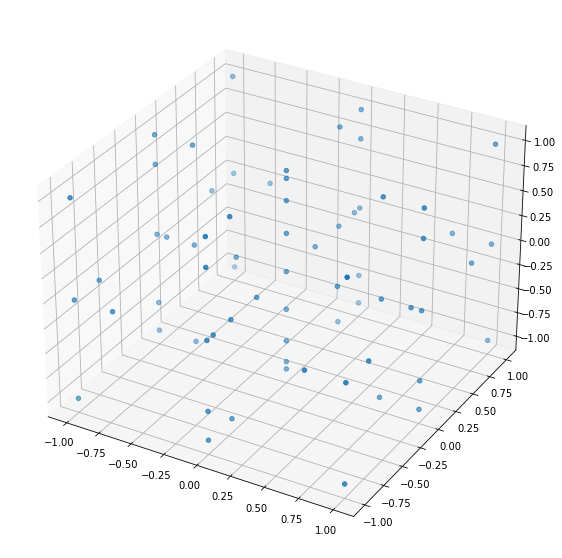

In [6]:
grid = Tasmanian.SparseGrid() #creates a sparse grid instance
grid.makeGlobalGrid(3,0,3,"level", "clenshaw-curtis")
aPoints_l3 = grid.getPoints()
aWeights_l3 = grid.getQuadratureWeights()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(aPoints_l3[:,0],aPoints_l3[:,1],aPoints_l3[:,2])

plt.show()

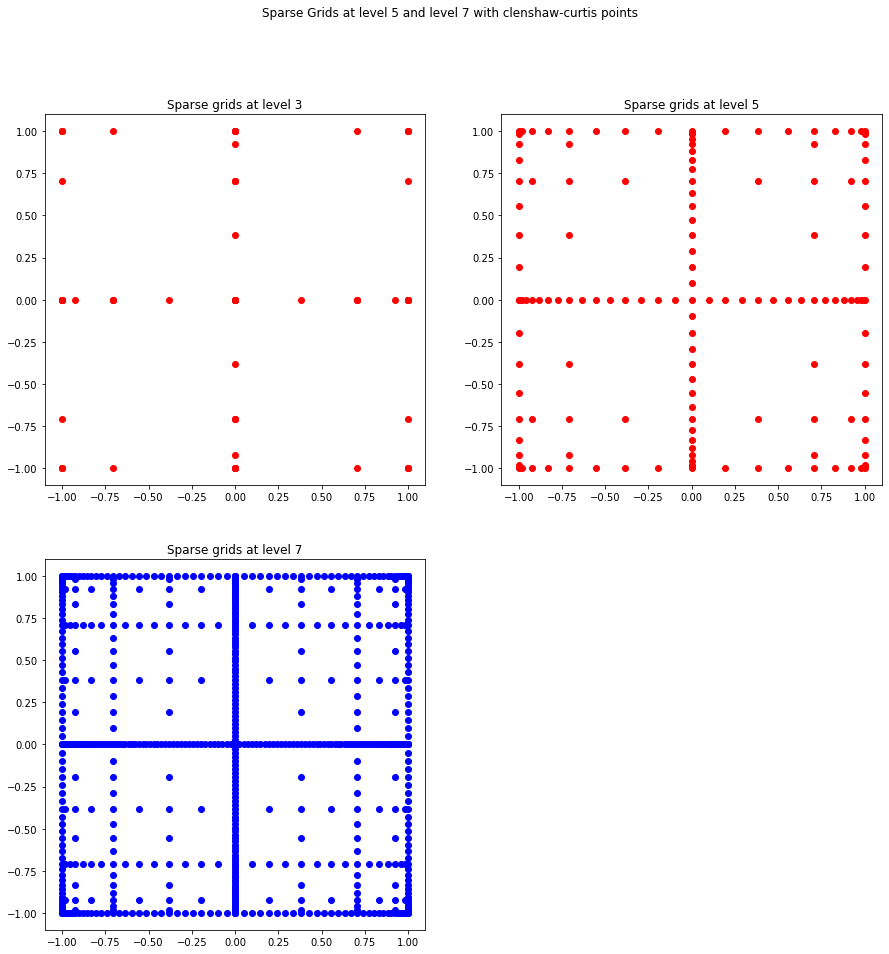

In [7]:
#The sparse grids used to approximate the integral
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.scatter(aPoints_l3[:,0],aPoints_l3[:,1], color = 'red')
plt.title('Sparse grids at level 3')

plt.subplot(2,2,2)
plt.scatter(aPoints_l5[:,0],aPoints_l5[:,1], color = 'red')
plt.title('Sparse grids at level 5')

plt.subplot(2,2,3)
plt.scatter(aPoints_l7[:,0],aPoints_l7[:,1], color = 'blue')
plt.title('Sparse grids at level 7')

plt.suptitle('Sparse Grids at level 5 and level 7 with clenshaw-curtis points')

plt.show()

In [8]:
help(grid.makeGlobalGrid)

Help on method makeGlobalGrid in module TasmanianSG:

makeGlobalGrid(iDimension, iOutputs, iDepth, sType, sRule, liAnisotropicWeights=[], fAlpha=0.0, fBeta=0.0, sCustomFilename='', liLevelLimits=[]) method of TasmanianSG.TasmanianSparseGrid instance
    creates a new sparse grid using a global rule
    discards any existing grid held by this class
    
    iDimension: int (positive)
                the number of inputs
    
    iOutputs: int (non-negative)
              the number of outputs
    
    iDepth: int (non-negative)
            controls the density of the grid, i.e.,
            the offset for the tensor selection, the meaning of
            iDepth depends on sType
            Example 1: sType == 'iptotal' will give a grid that
                       interpolates exactly all polynomials of
                       degree up to and including iDepth
            Example 2: sType == 'qptotal' will give a grid that
                       integrates exactly all polynomials of degree

In [9]:
os.listdir()

['testCommon.py',
 'testUnstructuredData.py',
 'example_sparse_grids_08.py',
 'testMisc.py',
 'example_dream_01.py',
 'TasmanianDreamSampler.py',
 'example_dream.py',
 'TasmanianDreamLikely.py',
 'example_sparse_grids_07.py',
 'example_sparse_grids_10.py',
 'testRefinement.py',
 'CMakeFiles',
 'testMakeUpdate.py',
 'testBasicIO.py',
 'example_sparse_grids_06.py',
 'TasmanianDREAM.py',
 'example_sparse_grids_05.py',
 'example_dream_04.py',
 'sandbox.py',
 'TasmanianConfig.py',
 'example_sparse_grids_04.py',
 'Makefile',
 'TasmanianDreamState.py',
 'cmake_install.cmake',
 'configured',
 'example_dream_05.py',
 'example_dream_02.py',
 'testConfigureData.py',
 'testTSG.py',
 'testExceptions.py',
 'example_sparse_grids_01.py',
 '__pycache__',
 'Tasmanian.py',
 'GaussPattersonRule.table',
 'example_sparse_grids_09.py',
 'example_dream_03.py',
 'testDream.py',
 'TasmanianSG.py',
 'testAcceleration.py',
 'example_sparse_grids_02.py',
 'example_sparse_grids.py',
 'example_sparse_grids_03.py',
 

In [10]:
# Todo try out different example_sparse_grids 
# And take a look at
# https://tasmanian.ornl.gov/documents/TasmanianMathManual.pdf
# write small conclusions about code and theory right here!
#rough sketch of the formulas

In [11]:
print("\n---------------------------------------------------------------------------------------------------\n")
print("Example 2: integrate f(x,y) = exp(-x^2) * cos(y) over [-5,5] x [-2,3]")
print("           using  Gauss-Patterson nodes and total degree polynomial space)")

iNumDimensions = 2
iExactness = 20

fExactIntegral = 1.861816427518323e+00

# the type_qptotal will guarantee exact integral for all polynomials with degree 20 or less
grid = Tasmanian.makeGlobalGrid(iNumDimensions, 0, iExactness, "qptotal", "gauss-patterson")
grid.setDomainTransform(np.array([[-5.0, 5.0], [-2.0, 3.0]])) # set the non-canonical domain

aPoints = grid.getPoints()
aWeights = grid.getQuadratureWeights()

fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1]))

fError = np.abs(fApproximateIntegral - fExactIntegral)

print("    at polynomial exactness".format(iExactness))
print("    the grid has: {0:1d}".format(grid.getNumPoints()))
print("    integral: {0:1.14e}".format(fApproximateIntegral))
print("       error: {0:1.14e}\n".format(fError))

iExactness = 40

# the type_qptotal will guarantee exact integral for all polynomials with degree 20 or less
grid = Tasmanian.makeGlobalGrid(iNumDimensions, 0, iExactness, "qptotal", "gauss-patterson")
grid.setDomainTransform(np.array([[-5.0, 5.0], [-2.0, 3.0]])) # must reset the domain

aPoints = grid.getPoints()
aWeights = grid.getQuadratureWeights()

fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1]))

fError = np.abs(fApproximateIntegral - fExactIntegral)

print("    at polynomial exactness".format(iExactness))
print("    the grid has: {0:1d}".format(grid.getNumPoints()))
print("    integral: {0:1.14e}".format(fApproximateIntegral))
print("       error: {0:1.14e}\n".format(fError))


---------------------------------------------------------------------------------------------------

Example 2: integrate f(x,y) = exp(-x^2) * cos(y) over [-5,5] x [-2,3]
           using  Gauss-Patterson nodes and total degree polynomial space)
    at polynomial exactness
    the grid has: 161
    integral: 1.86459164652247e+00
       error: 2.77521900414479e-03

    at polynomial exactness
    the grid has: 705
    integral: 1.86181642759028e+00
       error: 7.19606596533140e-11



## References
1. Prof. Dr. Martin Frank, Lecture Note : Uncertainty Quantification, SS20, SCC KIT 
2. https://tasmanian.ornl.gov/documents/TasmanianMathManual.pdf
